In [54]:
import numpy as np  
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

In [55]:
data=pd.read_csv('weatherAUS.csv')

In [56]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [58]:
data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [59]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [60]:
data_copy=data.copy()

In [61]:
data_copy=data_copy.dropna()
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [62]:
data_copy.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [63]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], 
 format = '%Y-%m-%d', 
 errors = 'coerce')

In [64]:
data_copy['year'] = data_copy['Date'].dt.year
data_copy['month'] = data_copy['Date'].dt.month
data_copy['day'] = data_copy['Date'].dt.day

In [65]:
data_copy.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,6


In [66]:
data_copy.drop('Date',axis=1,inplace=True)

In [67]:
data_copy.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,6


In [68]:
RainTomorrow = data_copy['RainTomorrow']
features = data_copy.drop('RainTomorrow', axis = 1)

X= features.values
y = RainTomorrow.values

In [69]:
X[0]

array(['Cobar', 17.9, 35.2, 0.0, 12.0, 12.3, 'SSW', 48.0, 'ENE', 'SW',
       6.0, 20.0, 20.0, 13.0, 1006.3, 1004.4, 2.0, 5.0, 26.6, 33.4, 'No',
       2009, 1, 1], dtype=object)

In [70]:
data_copy.RainTomorrow.value_counts()

No     43993
Yes    12427
Name: RainTomorrow, dtype: int64

In [71]:
data_copy.RainToday.value_counts()

No     43958
Yes    12462
Name: RainToday, dtype: int64

In [72]:
data_copy.loc[(data_copy.RainToday!=data_copy.RainTomorrow)]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
6067,Cobar,21.4,37.5,0.0,14.8,6.9,NNE,43.0,ENE,NNE,...,1009.6,7.0,6.0,26.2,34.1,No,Yes,2009,1,19
6068,Cobar,23.3,39.4,4.8,12.0,10.9,W,59.0,N,NW,...,1008.5,1.0,7.0,27.0,37.0,Yes,No,2009,1,20
6070,Cobar,21.8,30.7,0.0,8.0,5.9,WNW,56.0,N,N,...,1006.2,7.0,7.0,24.4,27.3,No,Yes,2009,1,22
6072,Cobar,22.1,34.7,8.6,8.6,12.4,NNW,50.0,SSW,SW,...,1008.3,2.0,6.0,28.1,33.2,Yes,No,2009,1,24
6082,Cobar,23.6,40.4,0.6,11.8,12.2,WSW,54.0,E,SSW,...,1005.0,1.0,2.0,29.9,38.7,No,Yes,2009,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142234,Darwin,25.6,33.0,7.2,5.6,7.9,ENE,39.0,ENE,NE,...,1008.4,5.0,3.0,29.3,32.5,Yes,No,2017,4,17
142236,Darwin,25.2,33.5,0.0,4.8,11.2,ENE,37.0,E,WNW,...,1010.1,1.0,4.0,28.9,33.1,No,Yes,2017,4,19
142237,Darwin,24.7,33.7,1.8,6.2,9.7,ENE,33.0,ESE,ENE,...,1010.0,6.0,6.0,27.7,33.1,Yes,No,2017,4,20
142244,Darwin,24.4,27.4,0.2,2.2,0.0,ESE,39.0,SE,ESE,...,1008.8,8.0,8.0,25.5,25.9,No,Yes,2017,4,27


In [73]:
data_copy['RainToday'] = [0 if x == 'No' else 1 for x in data_copy['RainToday']]
data_copy['RainTomorrow'] = [0 if x == 'No' else 1 for x in data_copy['RainTomorrow']]

In [74]:
data_copy.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,0,0,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,0,0,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,0,0,2009,1,5
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,0,0,2009,1,6


In [75]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Te

In [76]:
data_copy.WindDir3pm.unique()

array(['SW', 'SSE', 'NNW', 'WSW', 'WNW', 'S', 'ENE', 'N', 'SE', 'NNE',
       'NW', 'E', 'ESE', 'NE', 'SSW', 'W'], dtype=object)

In [77]:
data_copy['WindGustDir_S']=[1 if 'S' in x else 0 for x in data_copy['WindGustDir']]
data_copy['WindGustDir_W']=[1 if 'W' in x else 0 for x in data_copy['WindGustDir']]
data_copy['WindGustDir_E']=[1 if 'E' in x else 0 for x in data_copy['WindGustDir']]
data_copy['WindGustDir_N']=[1 if 'N' in x else 0 for x in data_copy['WindGustDir']]
data_copy['WindDir9am_S']=[1 if 'S' in x else 0 for x in data_copy['WindDir9am']]
data_copy['WindDir9am_W']=[1 if 'W' in x else 0 for x in data_copy['WindDir9am']]
data_copy['WindDir9am_E']=[1 if 'E' in x else 0 for x in data_copy['WindDir9am']]
data_copy['WindDir9am_N']=[1 if 'N' in x else 0 for x in data_copy['WindDir9am']]
data_copy['WindDir3pm_S']=[1 if 'S' in x else 0 for x in data_copy['WindDir3pm']]
data_copy['WindDir3pm_W']=[1 if 'W' in x else 0 for x in data_copy['WindDir3pm']]
data_copy['WindDir3pm_E']=[1 if 'E' in x else 0 for x in data_copy['WindDir3pm']]
data_copy['WindDir3pm_N']=[1 if 'N' in x else 0 for x in data_copy['WindDir3pm']]

In [78]:
data_copy.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindGustDir_E,WindGustDir_N,WindDir9am_S,WindDir9am_W,WindDir9am_E,WindDir9am_N,WindDir3pm_S,WindDir3pm_W,WindDir3pm_E,WindDir3pm_N
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,0,0,0,0,1,1,1,1,0,0
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,0,0,1,0,1,0,1,0,1,0
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1,1,0,0,1,1,0,1,0,1
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,0,1,0,1,0,1,1,1,0,0
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,0,1,0,1,0,1,0,1,0,1


In [79]:
data_copy.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1,inplace=True)

In [80]:
data_copy.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir_E,WindGustDir_N,WindDir9am_S,WindDir9am_W,WindDir9am_E,WindDir9am_N,WindDir3pm_S,WindDir3pm_W,WindDir3pm_E,WindDir3pm_N
6049,Cobar,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,...,0,0,0,0,1,1,1,1,0,0
6050,Cobar,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,...,0,0,1,0,1,0,1,0,1,0
6052,Cobar,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,...,1,1,0,0,1,1,0,1,0,1
6053,Cobar,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,...,0,1,0,1,0,1,1,1,0,0
6054,Cobar,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,...,0,1,0,1,0,1,0,1,0,1


In [81]:
data_copy.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [82]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
transformed_Loacation = ohe.fit_transform(data_copy[['Location']]).toarray()

In [83]:
len(transformed_Loacation)

56420

In [84]:
print(ohe.categories_)

[array(['AliceSprings', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Darwin', 'Hobart', 'Melbourne',
       'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier',
       'NorfolkIsland', 'Nuriootpa', 'Perth', 'PerthAirport', 'Portland',
       'Sale', 'Sydney', 'SydneyAirport', 'Townsville', 'WaggaWagga',
       'Watsonia', 'Williamtown', 'Woomera'], dtype=object)]


In [85]:
temp=pd.DataFrame(transformed_Loacation,
                           columns=['AliceSprings', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Darwin', 'Hobart', 'Melbourne',
       'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier',
       'NorfolkIsland', 'Nuriootpa', 'Perth', 'PerthAirport', 'Portland',
       'Sale', 'Sydney', 'SydneyAirport', 'Townsville', 'WaggaWagga',
       'Watsonia', 'Williamtown', 'Woomera'])
temp

,AliceSprings,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Darwin,Hobart,Melbourne,MelbourneAirport,...,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,Williamtown,Woomera
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56416,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56417,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56418,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
data_copy2=data_copy.reset_index()

In [87]:
data_copy2=data_copy2.join(temp)

In [88]:
data_copy2.head(4)

,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,Williamtown,Woomera
0,6049,Cobar,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6050,Cobar,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6052,Cobar,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6053,Cobar,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
data_copy2 = data_copy2.drop('Location', axis = 1)

In [90]:
data_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             56420 non-null  int64  
 1   MinTemp           56420 non-null  float64
 2   MaxTemp           56420 non-null  float64
 3   Rainfall          56420 non-null  float64
 4   Evaporation       56420 non-null  float64
 5   Sunshine          56420 non-null  float64
 6   WindGustSpeed     56420 non-null  float64
 7   WindSpeed9am      56420 non-null  float64
 8   WindSpeed3pm      56420 non-null  float64
 9   Humidity9am       56420 non-null  float64
 10  Humidity3pm       56420 non-null  float64
 11  Pressure9am       56420 non-null  float64
 12  Pressure3pm       56420 non-null  float64
 13  Cloud9am          56420 non-null  float64
 14  Cloud3pm          56420 non-null  float64
 15  Temp9am           56420 non-null  float64
 16  Temp3pm           56420 non-null  float6

In [91]:
data_copy2.shape

(56420, 60)

In [92]:
data_copy2.RainTomorrow.value_counts()

0    43993
1    12427
Name: RainTomorrow, dtype: int64

In [93]:
data_copy3 = data_copy2[data_copy2['RainTomorrow']==0]
data_copy4 = data_copy2[data_copy2['RainTomorrow']==1]
data_copy3 = data_copy3.sample(data_copy4.shape[0])
AllData = data_copy3.append(data_copy4)
AllData.shape

(24854, 60)

In [94]:
AllData.RainTomorrow.value_counts()

1    12427
0    12427
Name: RainTomorrow, dtype: int64

In [95]:
AllData = AllData.drop('index', axis = 1)
RainTomorrow = AllData['RainTomorrow']
features = AllData.drop('RainTomorrow', axis = 1)

X = features.values
y = RainTomorrow.values

In [96]:
def print_cm(cm, labels=['Not RainTomorrow', 'RainTomorrow'], hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.35)

In [98]:
target_names = ['Not RainTomorrow', 'RainTomorrow']

In [112]:
dummy_majority = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion_dummy_majority = confusion_matrix(y_test, y_majority_predicted)
print("DummyClassifier with stratified strategy")
print_cm(confusion_dummy_majority, ['Not RainTomorrow', 'RainTomorrow'])

DummyClassifier with stratified strategy
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           2169.0           2196.0 
        RainTomorrow           2166.0           2168.0 


In [113]:
print("DummyClassifier with stratified strategy")
print(classification_report(y_test, y_majority_predicted, target_names=target_names))

DummyClassifier with stratified strategy
                  precision    recall  f1-score   support

Not RainTomorrow       0.50      0.50      0.50      4365
    RainTomorrow       0.50      0.50      0.50      4334

        accuracy                           0.50      8699
       macro avg       0.50      0.50      0.50      8699
    weighted avg       0.50      0.50      0.50      8699



In [101]:
knn = KNeighborsClassifier(n_neighbors=200).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
confusion_knn = confusion_matrix(y_test, knn_predicted)
print("KNeighborsClassifier")
print_cm(confusion_knn, ['Not RainTomorrow', 'RainTomorrow'])

KNeighborsClassifier
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3663.0            702.0 
        RainTomorrow           1159.0           3175.0 


In [102]:
print("KNeighborsClassifier")
print(classification_report(y_test, knn_predicted, target_names=target_names))

KNeighborsClassifier
                  precision    recall  f1-score   support

Not RainTomorrow       0.76      0.84      0.80      4365
    RainTomorrow       0.82      0.73      0.77      4334

        accuracy                           0.79      8699
       macro avg       0.79      0.79      0.79      8699
    weighted avg       0.79      0.79      0.79      8699



In [103]:
lr = LogisticRegression(max_iter=300).fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion_lr = confusion_matrix(y_test, lr_predicted)
print("LogisticRegression")
print_cm(confusion_lr, ['Not RainTomorrow', 'RainTomorrow'])

LogisticRegression
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3520.0            845.0 
        RainTomorrow            951.0           3383.0 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [104]:
print("LogisticRegression")
print(classification_report(y_test, lr_predicted, target_names=target_names))

LogisticRegression
                  precision    recall  f1-score   support

Not RainTomorrow       0.79      0.81      0.80      4365
    RainTomorrow       0.80      0.78      0.79      4334

        accuracy                           0.79      8699
       macro avg       0.79      0.79      0.79      8699
    weighted avg       0.79      0.79      0.79      8699



In [105]:
dt = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion_dt = confusion_matrix(y_test, tree_predicted)
print("DecisionTreeClassifier")
print_cm(confusion_dt, ['Not RainTomorrow', 'RainTomorrow'])

DecisionTreeClassifier
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3320.0           1045.0 
        RainTomorrow            962.0           3372.0 


In [106]:
print("DecisionTreeClassifier")
print(classification_report(y_test, tree_predicted, target_names=target_names))

DecisionTreeClassifier
                  precision    recall  f1-score   support

Not RainTomorrow       0.78      0.76      0.77      4365
    RainTomorrow       0.76      0.78      0.77      4334

        accuracy                           0.77      8699
       macro avg       0.77      0.77      0.77      8699
    weighted avg       0.77      0.77      0.77      8699



In [107]:
svm = SVC().fit(X_train, y_train)
svm_predicted_mc = svm.predict(X_test)
confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
print("SVM")
print_cm(confusion_mc, ['Not RainTomorrow', 'RainTomorrow'])

SVM
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3395.0            970.0 
        RainTomorrow           1006.0           3328.0 


In [108]:
print("SVM")
print(classification_report(y_test, svm_predicted_mc, target_names=target_names))

SVM
                  precision    recall  f1-score   support

Not RainTomorrow       0.77      0.78      0.77      4365
    RainTomorrow       0.77      0.77      0.77      4334

        accuracy                           0.77      8699
       macro avg       0.77      0.77      0.77      8699
    weighted avg       0.77      0.77      0.77      8699



In [109]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
confusion_mc = confusion_matrix(y_test, y_pred_rf)
print("RandomForestClassifier")
print_cm(confusion_mc, ['Not RainTomorrow', 'RainTomorrow'])

RandomForestClassifier
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3374.0            991.0 
        RainTomorrow            818.0           3516.0 


In [110]:
print("RandomForestClassifier")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

RandomForestClassifier
                  precision    recall  f1-score   support

Not RainTomorrow       0.80      0.77      0.79      4365
    RainTomorrow       0.78      0.81      0.80      4334

        accuracy                           0.79      8699
       macro avg       0.79      0.79      0.79      8699
    weighted avg       0.79      0.79      0.79      8699



In [1]:
# print(dt.feature_importances_)
# n_features = X_train.shape[1]
# print(n_features)
# plt.barh(range(n_features),dt.feature_importances_, align='center', height=1)
# plt.yticks(np.arange(n_features), AllData.columns[1:])
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.show()

# pipeline

#### LogisticRegression

In [133]:
pip = make_pipeline(PCA(n_components=45),MinMaxScaler(),LogisticRegression(max_iter=500))

pip.fit(X_train, y_train)

pip_pre = pip.predict(X_test)

In [134]:
scores = cross_val_score(pip, X_test, y_test, cv=7)
print('Cross-validation (accuracy)', scores)

scores = cross_val_score(pip, X_test, y_test,cv=7, scoring = 'precision')
print('Cross-validation (precision)', scores)

scores = cross_val_score(pip, X_test, y_test,cv=7, scoring = 'recall')
print('Cross-validation (recall)', scores)

scores = cross_val_score(pip, X_test, y_test, cv=7, scoring = 'roc_auc')
print('Cross-validation (AUC)', scores)

Cross-validation (accuracy) [0.8004827  0.79243765 0.80933226 0.8149638  0.80691874 0.80193237
 0.7826087 ]
Cross-validation (precision) [0.80560132 0.80612245 0.82735043 0.81219904 0.8121911  0.79904306
 0.79292929]
Cross-validation (recall) [0.78998384 0.76575121 0.7819063  0.8174475  0.79516129 0.80775444
 0.76252019]
Cross-validation (AUC) [0.90000414 0.8736641  0.88822957 0.89684562 0.89043132 0.88588491
 0.87314755]


#### SVM

In [135]:
pip1 = make_pipeline(MinMaxScaler(),SVC(C=1e9,gamma=1e-07)) # PCA()×

pip1.fit(X_train, y_train)

pip_pre = pip1.predict(X_test)

In [136]:
scores = cross_val_score(pip1, X_test, y_test, cv=4) # CV = [3,5,7]×
print('Cross-validation (accuracy)', scores)

scores = cross_val_score(pip1, X_test, y_test,cv=4, scoring = 'precision') # CV = [3,5,7]×
print('Cross-validation (precision)', scores)

scores = cross_val_score(pip1, X_test, y_test,cv=4, scoring = 'recall') # CV = [3,5,7]×
print('Cross-validation (recall)', scores)

scores = cross_val_score(pip1, X_test, y_test, cv=4, scoring = 'roc_auc') # CV = [3,5,7]×
print('Cross-validation (AUC)', scores)

Cross-validation (accuracy) [0.79126437 0.81011494 0.79908046 0.79392824]
Cross-validation (precision) [0.79310345 0.81443299 0.79981464 0.78942571]
Cross-validation (recall) [0.78578024 0.80166052 0.79612546 0.79963066]
Cross-validation (AUC) [0.88303502 0.88943672 0.8799495  0.87780827]


# GridSearchCV

In [137]:
param_grid = {'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized'],
              'logisticregression__C': [0.01, 0.1, 1,10],
              'logisticregression__max_iter': [300, 500, 1000,2000],
              'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }
grid1 = GridSearchCV(pip, param_grid)

gri_pre = grid1.fit(X_train,y_train)

In [138]:
print("the best parameters",grid1.best_params_)

print('best score : ', grid1.best_score_)

y_decision_fn_scores_auc = grid1.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))

the best parameters {'logisticregression__C': 1, 'logisticregression__max_iter': 2000, 'logisticregression__solver': 'liblinear', 'pca__svd_solver': 'randomized'}
best score :  0.807799442896936
Test set AUC:  0.8873874545338255


In [139]:
print("Best estimator:\n{}".format(grid1.best_estimator_))

Best estimator:
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=45,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=2000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [140]:
scores = cross_val_score(grid1.best_estimator_, X_test, y_test, cv=5)
print('Cross-validation (accuracy)', scores)

scores = cross_val_score(grid1.best_estimator_, X_test, y_test,cv=5, scoring = 'precision')
print('Cross-validation (precision)', scores)

scores = cross_val_score(grid1.best_estimator_, X_test, y_test,cv=5, scoring = 'recall')
print('Cross-validation (recall)', scores)

scores = cross_val_score(grid1.best_estimator_, X_test, y_test, cv=5, scoring = 'roc_auc')
print('Cross-validation (AUC)', scores)

Cross-validation (accuracy) [0.7954023  0.80517241 0.80689655 0.80632184 0.79355952]
Cross-validation (precision) [0.80429594 0.81686747 0.80482204 0.80742459 0.80286738]
Cross-validation (recall) [0.77739331 0.78316032 0.80968858 0.80276817 0.77598152]
Cross-validation (AUC) [0.88866296 0.88899062 0.88609192 0.88742897 0.88164435]


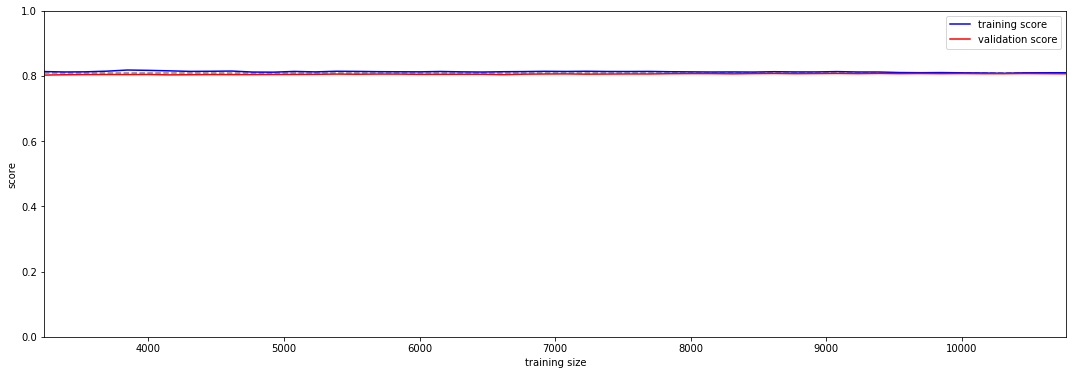

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)


N, train_lc, val_lc = learning_curve(grid1.best_estimator_,
                                     X_train, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')

ax.set_ylim(0, 1)
ax.set_xlim(N[0], N[-1])
ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.legend(loc='best')

In [143]:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (16155, 58)
X_train_selected.shape: (16155, 29)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True False False False False  True  True False
  True  True  True  True  True False  True  True  True False False False
 False False False False False False  True False False False False False
 False  True False False False False False False False  True]


([], <a list of 0 Text yticklabel objects>)

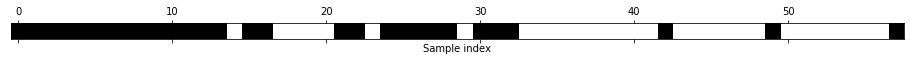

In [144]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [145]:
# transform test data
X_test_selected = select.transform(X_test)

In [146]:
dummy_majority = DummyClassifier(strategy='stratified').fit(X_train_selected, y_train)
y_majority_predicted = dummy_majority.predict(X_test_selected)
confusion_dummy_majority = confusion_matrix(y_test, y_majority_predicted)
print("DummyClassifier with stratified strategy")
print_cm(confusion_dummy_majority, ['Not RainTomorrow', 'RainTomorrow'])

DummyClassifier with stratified strategy
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           2175.0           2190.0 
        RainTomorrow           2146.0           2188.0 


In [147]:
print("DummyClassifier with stratified strategy")
print(classification_report(y_test, y_majority_predicted, target_names=target_names))

DummyClassifier with stratified strategy
                  precision    recall  f1-score   support

Not RainTomorrow       0.50      0.50      0.50      4365
    RainTomorrow       0.50      0.50      0.50      4334

        accuracy                           0.50      8699
       macro avg       0.50      0.50      0.50      8699
    weighted avg       0.50      0.50      0.50      8699



In [148]:
knn = KNeighborsClassifier(n_neighbors=200).fit(X_train_selected, y_train)
knn_predicted = knn.predict(X_test_selected)
confusion_knn = confusion_matrix(y_test, knn_predicted)
print("KNeighborsClassifier")
print_cm(confusion_knn, ['Not RainTomorrow', 'RainTomorrow'])

KNeighborsClassifier
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3648.0            717.0 
        RainTomorrow           1128.0           3206.0 


In [149]:
print("KNeighborsClassifier")
print(classification_report(y_test, knn_predicted, target_names=target_names))

KNeighborsClassifier
                  precision    recall  f1-score   support

Not RainTomorrow       0.76      0.84      0.80      4365
    RainTomorrow       0.82      0.74      0.78      4334

        accuracy                           0.79      8699
       macro avg       0.79      0.79      0.79      8699
    weighted avg       0.79      0.79      0.79      8699



In [150]:
lr = LogisticRegression(max_iter=300).fit(X_train_selected, y_train)
lr_predicted = lr.predict(X_test_selected)
confusion_lr = confusion_matrix(y_test, lr_predicted)
print("LogisticRegression")
print_cm(confusion_lr, ['Not RainTomorrow', 'RainTomorrow'])

LogisticRegression
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3496.0            869.0 
        RainTomorrow            922.0           3412.0 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [151]:
print("LogisticRegression")
print(classification_report(y_test, lr_predicted, target_names=target_names))

LogisticRegression
                  precision    recall  f1-score   support

Not RainTomorrow       0.79      0.80      0.80      4365
    RainTomorrow       0.80      0.79      0.79      4334

        accuracy                           0.79      8699
       macro avg       0.79      0.79      0.79      8699
    weighted avg       0.79      0.79      0.79      8699



In [152]:
dt = DecisionTreeClassifier(max_depth=10).fit(X_train_selected, y_train)
tree_predicted = dt.predict(X_test_selected)
confusion_dt = confusion_matrix(y_test, tree_predicted)
print("DecisionTreeClassifier")
print_cm(confusion_dt, ['Not RainTomorrow', 'RainTomorrow'])

DecisionTreeClassifier
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3318.0           1047.0 
        RainTomorrow           1002.0           3332.0 


In [153]:
print("DecisionTreeClassifier")
print(classification_report(y_test, tree_predicted, target_names=target_names))

DecisionTreeClassifier
                  precision    recall  f1-score   support

Not RainTomorrow       0.77      0.76      0.76      4365
    RainTomorrow       0.76      0.77      0.76      4334

        accuracy                           0.76      8699
       macro avg       0.76      0.76      0.76      8699
    weighted avg       0.76      0.76      0.76      8699



In [154]:
svm = SVC().fit(X_train_selected, y_train)
svm_predicted_mc = svm.predict(X_test_selected)
confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
print("SVM")
print_cm(confusion_mc, ['Not RainTomorrow', 'RainTomorrow'])

SVM
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3518.0            847.0 
        RainTomorrow           1051.0           3283.0 


In [155]:
print("SVM")
print(classification_report(y_test, svm_predicted_mc, target_names=target_names))

SVM
                  precision    recall  f1-score   support

Not RainTomorrow       0.77      0.81      0.79      4365
    RainTomorrow       0.79      0.76      0.78      4334

        accuracy                           0.78      8699
       macro avg       0.78      0.78      0.78      8699
    weighted avg       0.78      0.78      0.78      8699



In [156]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train_selected, y_train)
y_pred_rf = rnd_clf.predict(X_test_selected)
confusion_mc = confusion_matrix(y_test, y_pred_rf)
print("RandomForestClassifier")
print_cm(confusion_mc, ['Not RainTomorrow', 'RainTomorrow'])

RandomForestClassifier
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3388.0            977.0 
        RainTomorrow            827.0           3507.0 


In [157]:
print("RandomForestClassifier")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

RandomForestClassifier
                  precision    recall  f1-score   support

Not RainTomorrow       0.80      0.78      0.79      4365
    RainTomorrow       0.78      0.81      0.80      4334

        accuracy                           0.79      8699
       macro avg       0.79      0.79      0.79      8699
    weighted avg       0.79      0.79      0.79      8699



[2.88953666e-02 1.18704799e-02 2.76877223e-02 2.21784147e-02
 4.22290833e-01 6.61547438e-02 1.33254403e-02 1.47758345e-02
 2.77707008e-02 1.73216331e-01 2.05203164e-02 9.44763643e-02
 1.09256213e-02 2.50178305e-02 1.53238422e-02 6.61416075e-04
 1.81357314e-03 1.69056332e-03 8.13608910e-04 8.99135911e-04
 1.60407831e-03 7.22328461e-03 4.43669144e-03 0.00000000e+00
 2.38800236e-03 7.45272127e-04 1.51576669e-03 1.65998127e-03
 1.18784928e-04]
29


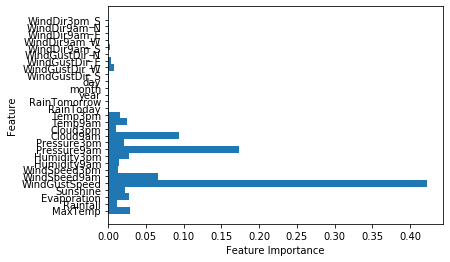

In [158]:
print(dt.feature_importances_)
n_features = X_train_selected.shape[1]
print(n_features)
plt.barh(range(n_features),dt.feature_importances_, align='center', height=1)
plt.yticks(np.arange(n_features), AllData.columns[1:])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# pipeline

#### LogisticRegression

In [160]:
pip = make_pipeline(PCA(n_components=25),MinMaxScaler(),LogisticRegression(max_iter=500))

pip.fit(X_train_selected, y_train)

pip_pre = pip.predict(X_test_selected)

In [161]:
scores = cross_val_score(pip, X_test_selected, y_test, cv=7)
print('Cross-validation (accuracy)', scores)

scores = cross_val_score(pip, X_test_selected, y_test,cv=7, scoring = 'precision')
print('Cross-validation (precision)', scores)

scores = cross_val_score(pip, X_test_selected, y_test,cv=7, scoring = 'recall')
print('Cross-validation (recall)', scores)

scores = cross_val_score(pip, X_test_selected, y_test, cv=7, scoring = 'roc_auc')
print('Cross-validation (AUC)', scores)

Cross-validation (accuracy) [0.80611424 0.7851971  0.80933226 0.81174578 0.79565567 0.79871176
 0.78180354]
Cross-validation (precision) [0.815      0.79431438 0.82931034 0.80701754 0.80298013 0.80295567
 0.79292929]
Cross-validation (recall) [0.78998384 0.76736672 0.77705977 0.8174475  0.78225806 0.78998384
 0.76090468]
Cross-validation (AUC) [0.89777505 0.87164212 0.88714221 0.89210006 0.88338166 0.88406973
 0.87037292]


#### SVM

In [162]:
pip1 = make_pipeline(MinMaxScaler(),SVC(C=1e9,gamma=1e-07)) # PCA()×

pip1.fit(X_train_selected, y_train)

pip_pre = pip1.predict(X_test_selected)

In [163]:
scores = cross_val_score(pip1, X_test_selected, y_test, cv=4) # CV = [3,5,7]×
print('Cross-validation (accuracy)', scores)

scores = cross_val_score(pip1, X_test_selected, y_test,cv=4, scoring = 'precision') # CV = [3,5,7]×
print('Cross-validation (precision)', scores)

scores = cross_val_score(pip1, X_test_selected, y_test,cv=4, scoring = 'recall') # CV = [3,5,7]×
print('Cross-validation (recall)', scores)

scores = cross_val_score(pip1, X_test_selected, y_test, cv=4, scoring = 'roc_auc') # CV = [3,5,7]×
print('Cross-validation (AUC)', scores)

Cross-validation (accuracy) [0.79034483 0.78942529 0.79034483 0.79530819]
Cross-validation (precision) [0.79381443 0.78874539 0.7859745  0.79212454]
Cross-validation (recall) [0.7820868  0.78874539 0.79612546 0.79870729]
Cross-validation (AUC) [0.88087713 0.88376807 0.87420728 0.87270905]


# GridSearchCV

In [164]:
param_grid = {'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized'],
              'logisticregression__C': [0.01, 0.1, 1,10],
              'logisticregression__max_iter': [300, 500, 1000,2000],
              'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }
grid1 = GridSearchCV(pip, param_grid)

gri_pre = grid1.fit(X_train_selected,y_train)

In [165]:
print("the best parameters",grid1.best_params_)

print('best score : ', grid1.best_score_)

y_decision_fn_scores_auc = grid1.decision_function(X_test_selected) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))

the best parameters {'logisticregression__C': 10, 'logisticregression__max_iter': 300, 'logisticregression__solver': 'saga', 'pca__svd_solver': 'arpack'}
best score :  0.8025379139585269
Test set AUC:  0.8843886560407572


In [166]:
print("Best estimator:\n{}".format(grid1.best_estimator_))

Best estimator:
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=25,
                     random_state=None, svd_solver='arpack', tol=0.0,
                     whiten=False)),
                ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=300,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [167]:
scores = cross_val_score(grid1.best_estimator_, X_test_selected, y_test, cv=5)
print('Cross-validation (accuracy)', scores)

scores = cross_val_score(grid1.best_estimator_, X_test_selected, y_test,cv=5, scoring = 'precision')
print('Cross-validation (precision)', scores)

scores = cross_val_score(grid1.best_estimator_, X_test_selected, y_test,cv=5, scoring = 'recall')
print('Cross-validation (recall)', scores)

scores = cross_val_score(grid1.best_estimator_, X_test_selected, y_test, cv=5, scoring = 'roc_auc')
print('Cross-validation (AUC)', scores)

Cross-validation (accuracy) [0.79885057 0.80229885 0.80632184 0.79367816 0.79643473]
Cross-validation (precision) [0.81257557 0.81620314 0.80600462 0.79812207 0.804038  ]
Cross-validation (recall) [0.77508651 0.77854671 0.80507497 0.78431373 0.7817552 ]
Cross-validation (AUC) [0.88826661 0.88560308 0.88344425 0.88449988 0.87990762]


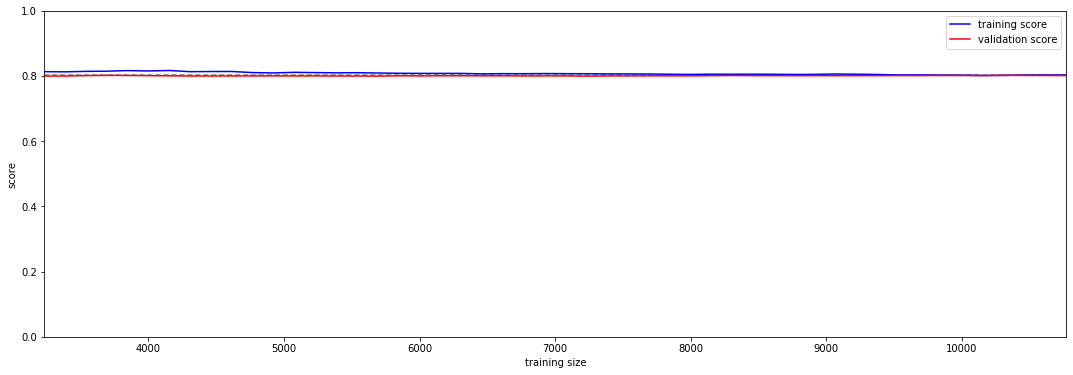

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)


N, train_lc, val_lc = learning_curve(grid1.best_estimator_,
                                     X_train_selected, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')

ax.set_ylim(0, 1)
ax.set_xlim(N[0], N[-1])
ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.legend(loc='best')

In [169]:
sel_var = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel_var.fit(X_train, y_train)
X_train_selected = sel_var.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (16155, 58)
X_train_selected.shape: (16155, 32)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


([], <a list of 0 Text yticklabel objects>)

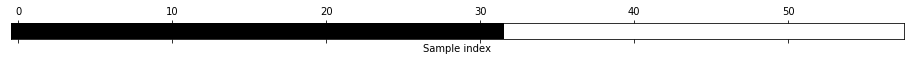

In [170]:
mask = sel_var.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [175]:
X_test_selected = sel_var.transform(X_test)

In [176]:
dummy_majority = DummyClassifier(strategy='stratified').fit(X_train_selected, y_train)
y_majority_predicted = dummy_majority.predict(X_test_selected)
confusion_dummy_majority = confusion_matrix(y_test, y_majority_predicted)
print("DummyClassifier with stratified strategy")
print_cm(confusion_dummy_majority, ['Not RainTomorrow', 'RainTomorrow'])

DummyClassifier with stratified strategy
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           2152.0           2213.0 
        RainTomorrow           2230.0           2104.0 


In [177]:
print("DummyClassifier with stratified strategy")
print(classification_report(y_test, y_majority_predicted, target_names=target_names))

DummyClassifier with stratified strategy
                  precision    recall  f1-score   support

Not RainTomorrow       0.49      0.49      0.49      4365
    RainTomorrow       0.49      0.49      0.49      4334

        accuracy                           0.49      8699
       macro avg       0.49      0.49      0.49      8699
    weighted avg       0.49      0.49      0.49      8699



In [178]:
knn = KNeighborsClassifier(n_neighbors=200).fit(X_train_selected, y_train)
knn_predicted = knn.predict(X_test_selected)
confusion_knn = confusion_matrix(y_test, knn_predicted)
print("KNeighborsClassifier")
print_cm(confusion_knn, ['Not RainTomorrow', 'RainTomorrow'])

KNeighborsClassifier
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3663.0            702.0 
        RainTomorrow           1156.0           3178.0 


In [179]:
print("KNeighborsClassifier")
print(classification_report(y_test, knn_predicted, target_names=target_names))

KNeighborsClassifier
                  precision    recall  f1-score   support

Not RainTomorrow       0.76      0.84      0.80      4365
    RainTomorrow       0.82      0.73      0.77      4334

        accuracy                           0.79      8699
       macro avg       0.79      0.79      0.79      8699
    weighted avg       0.79      0.79      0.79      8699



In [180]:
lr = LogisticRegression(max_iter=300).fit(X_train_selected, y_train)
lr_predicted = lr.predict(X_test_selected)
confusion_lr = confusion_matrix(y_test, lr_predicted)
print("LogisticRegression")
print_cm(confusion_lr, ['Not RainTomorrow', 'RainTomorrow'])

LogisticRegression
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3516.0            849.0 
        RainTomorrow            935.0           3399.0 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [181]:
print("LogisticRegression")
print(classification_report(y_test, lr_predicted, target_names=target_names))

LogisticRegression
                  precision    recall  f1-score   support

Not RainTomorrow       0.79      0.81      0.80      4365
    RainTomorrow       0.80      0.78      0.79      4334

        accuracy                           0.79      8699
       macro avg       0.80      0.79      0.79      8699
    weighted avg       0.80      0.79      0.79      8699



In [182]:
dt = DecisionTreeClassifier(max_depth=10).fit(X_train_selected, y_train)
tree_predicted = dt.predict(X_test_selected)
confusion_dt = confusion_matrix(y_test, tree_predicted)
print("DecisionTreeClassifier")
print_cm(confusion_dt, ['Not RainTomorrow', 'RainTomorrow'])

DecisionTreeClassifier
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3373.0            992.0 
        RainTomorrow           1053.0           3281.0 


In [183]:
print("DecisionTreeClassifier")
print(classification_report(y_test, tree_predicted, target_names=target_names))

DecisionTreeClassifier
                  precision    recall  f1-score   support

Not RainTomorrow       0.76      0.77      0.77      4365
    RainTomorrow       0.77      0.76      0.76      4334

        accuracy                           0.76      8699
       macro avg       0.76      0.76      0.76      8699
    weighted avg       0.76      0.76      0.76      8699



In [184]:
svm = SVC().fit(X_train_selected, y_train)
svm_predicted_mc = svm.predict(X_test_selected)
confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
print("SVM")
print_cm(confusion_mc, ['Not RainTomorrow', 'RainTomorrow'])

SVM
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3400.0            965.0 
        RainTomorrow           1011.0           3323.0 


In [185]:
print("SVM")
print(classification_report(y_test, svm_predicted_mc, target_names=target_names))

SVM
                  precision    recall  f1-score   support

Not RainTomorrow       0.77      0.78      0.77      4365
    RainTomorrow       0.77      0.77      0.77      4334

        accuracy                           0.77      8699
       macro avg       0.77      0.77      0.77      8699
    weighted avg       0.77      0.77      0.77      8699



In [186]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train_selected, y_train)
y_pred_rf = rnd_clf.predict(X_test_selected)
confusion_mc = confusion_matrix(y_test, y_pred_rf)
print("RandomForestClassifier")
print_cm(confusion_mc, ['Not RainTomorrow', 'RainTomorrow'])

RandomForestClassifier
                     Not RainTomorrow     RainTomorrow 
    Not RainTomorrow           3381.0            984.0 
        RainTomorrow            820.0           3514.0 


In [187]:
print("RandomForestClassifier")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

RandomForestClassifier
                  precision    recall  f1-score   support

Not RainTomorrow       0.80      0.77      0.79      4365
    RainTomorrow       0.78      0.81      0.80      4334

        accuracy                           0.79      8699
       macro avg       0.79      0.79      0.79      8699
    weighted avg       0.79      0.79      0.79      8699



[2.00967285e-02 1.21991513e-02 2.53567619e-02 2.06088730e-02
 4.15387988e-01 6.13645820e-02 9.07940855e-03 1.40538384e-02
 2.87218676e-02 1.69960823e-01 1.53229911e-02 8.83296896e-02
 1.06907182e-02 2.24380399e-02 1.61760288e-02 1.55636335e-02
 8.10658647e-04 9.56652777e-03 7.06783182e-03 1.02901840e-02
 3.46759950e-03 1.02226318e-03 9.35585776e-04 2.41789708e-03
 2.31080041e-03 1.93003218e-03 1.71843989e-03 5.47084399e-03
 4.50878003e-03 1.63313018e-03 3.49036840e-04 1.14926504e-03]
32


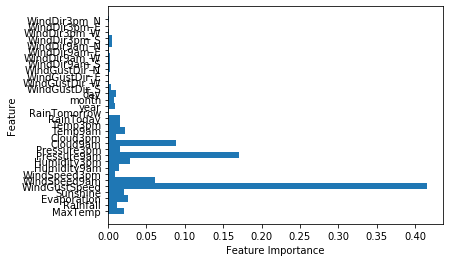

In [188]:
print(dt.feature_importances_)
n_features = X_train_selected.shape[1]
print(n_features)
plt.barh(range(n_features),dt.feature_importances_, align='center', height=1)
plt.yticks(np.arange(n_features), AllData.columns[1:])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# pipeline

#### LogisticRegression

In [189]:
pip = make_pipeline(PCA(n_components=25),MinMaxScaler(),LogisticRegression(max_iter=500))

pip.fit(X_train_selected, y_train)

pip_pre = pip.predict(X_test_selected)

In [190]:
scores = cross_val_score(pip, X_test_selected, y_test, cv=7)
print('Cross-validation (accuracy)', scores)

scores = cross_val_score(pip, X_test_selected, y_test,cv=7, scoring = 'precision')
print('Cross-validation (precision)', scores)

scores = cross_val_score(pip, X_test_selected, y_test,cv=7, scoring = 'recall')
print('Cross-validation (recall)', scores)

scores = cross_val_score(pip, X_test_selected, y_test, cv=7, scoring = 'roc_auc')
print('Cross-validation (AUC)', scores)

Cross-validation (accuracy) [0.7996782  0.78358809 0.80128721 0.81335479 0.79565567 0.7979066
 0.77536232]
Cross-validation (precision) [0.80528053 0.79560811 0.81740614 0.80376766 0.80602007 0.79773463
 0.78911565]
Cross-validation (recall) [0.78836834 0.76090468 0.77382876 0.82714055 0.77741935 0.79644588
 0.74959612]
Cross-validation (AUC) [0.89657895 0.86798393 0.88731826 0.89102046 0.88191891 0.88157257
 0.86982058]


#### SVM

In [191]:
pip1 = make_pipeline(MinMaxScaler(),SVC(C=1e9,gamma=1e-07)) # PCA()×

pip1.fit(X_train_selected, y_train)

pip_pre = pip1.predict(X_test_selected)

In [192]:
scores = cross_val_score(pip1, X_test_selected, y_test, cv=4) # CV = [3,5,7]×
print('Cross-validation (accuracy)', scores)

scores = cross_val_score(pip1, X_test_selected, y_test,cv=4, scoring = 'precision') # CV = [3,5,7]×
print('Cross-validation (precision)', scores)

scores = cross_val_score(pip1, X_test_selected, y_test,cv=4, scoring = 'recall') # CV = [3,5,7]×
print('Cross-validation (recall)', scores)

scores = cross_val_score(pip1, X_test_selected, y_test, cv=4, scoring = 'roc_auc') # CV = [3,5,7]×
print('Cross-validation (AUC)', scores)

Cross-validation (accuracy) [0.79218391 0.80321839 0.79770115 0.78886845]
Cross-validation (precision) [0.79185939 0.80885122 0.80725191 0.78467153]
Cross-validation (recall) [0.79039705 0.79243542 0.7804428  0.79409049]
Cross-validation (AUC) [0.88141998 0.88718329 0.87568871 0.87438058]


# GridSearchCV

In [193]:
param_grid = {'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized'],
              'logisticregression__C': [0.01, 0.1, 1,10],
              'logisticregression__max_iter': [300, 500, 1000,2000],
              'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }
grid1 = GridSearchCV(pip, param_grid)

gri_pre = grid1.fit(X_train_selected,y_train)

In [194]:
print("the best parameters",grid1.best_params_)

print('best score : ', grid1.best_score_)

y_decision_fn_scores_auc = grid1.decision_function(X_test_selected) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))

the best parameters {'logisticregression__C': 10, 'logisticregression__max_iter': 300, 'logisticregression__solver': 'liblinear', 'pca__svd_solver': 'auto'}
best score :  0.8035283194057568
Test set AUC:  0.8837781763418897


In [195]:
print("Best estimator:\n{}".format(grid1.best_estimator_))

Best estimator:
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=25,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=300,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [196]:
scores = cross_val_score(grid1.best_estimator_, X_test_selected, y_test, cv=5)
print('Cross-validation (accuracy)', scores)

scores = cross_val_score(grid1.best_estimator_, X_test_selected, y_test,cv=5, scoring = 'precision')
print('Cross-validation (precision)', scores)

scores = cross_val_score(grid1.best_estimator_, X_test_selected, y_test,cv=5, scoring = 'recall')
print('Cross-validation (recall)', scores)

scores = cross_val_score(grid1.best_estimator_, X_test_selected, y_test, cv=5, scoring = 'roc_auc')
print('Cross-validation (AUC)', scores)

Cross-validation (accuracy) [0.79655172 0.79712644 0.80517241 0.79770115 0.79010926]
Cross-validation (precision) [0.80499405 0.81418093 0.80275229 0.80187573 0.80072029]
Cross-validation (recall) [0.78085352 0.76816609 0.80738178 0.78892734 0.77020785]
Cross-validation (AUC) [0.88681858 0.88472713 0.88342179 0.88169499 0.87880315]


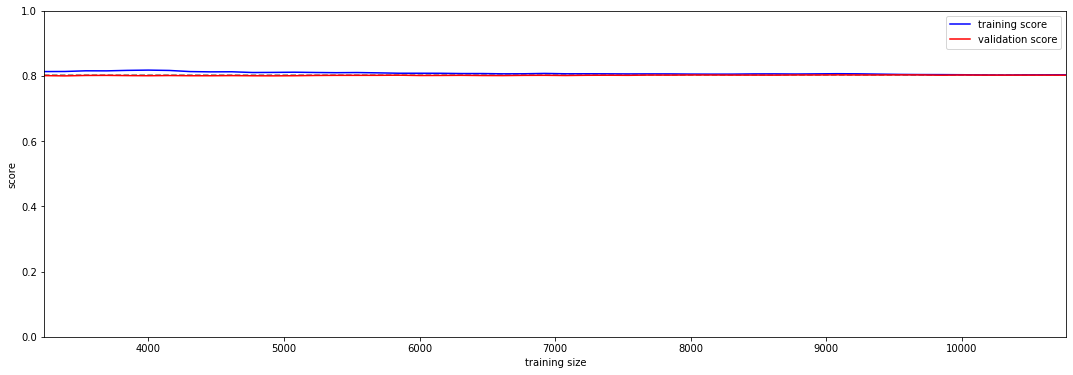

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)


N, train_lc, val_lc = learning_curve(grid1.best_estimator_,
                                     X_train_selected, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')

ax.set_ylim(0, 1)
ax.set_xlim(N[0], N[-1])
ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.legend(loc='best')

# هي لسا ما ساويتا 

In [ ]:
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=1000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))